%%latex
\tableofcontents

# PCA analysis of chromosome bands

In [31]:
%matplotlib inline

In [32]:
from os.path import join
from pandas import read_csv, concat, cut, DataFrame, Series, qcut
import seaborn as sns
from seaborn import scatterplot
from scipy.interpolate import splrep, BSpline
from pathlib import Path
import matplotlib.pyplot as plt
from json import load

In [33]:
SAMPLES = read_csv(join("input", "samples.csv"))
LOCATIONS = read_csv(join("input", "locations.csv"))
DATASETS = read_csv(join("input", "datasets.csv"))
POPULATIONS_TO_COMPARE = SAMPLES["super-population"].unique().tolist()
MULTIINDEX = ["CHROM", "POS", "ID", "REF", "ALT"]

In [34]:
with open(join("config", "manifest.json"), 'r') as config:
    config = load(config)

path = join(*config["output"])

In [35]:
# Create a a new dictionary to store data in.
DATA = dict()


for gene in LOCATIONS["location_name"].unique().tolist():
    DATA[gene] = dict()
    DATA[gene]["eigenvectors"] = read_csv(join(
            path,
            "generate_pca",
            gene,
            "pca.eigenvec"), sep="\t")
    
    DATA[gene]["eigenvalues"] = read_csv(join(
            path,
            "generate_pca",
            gene,
            "pca.eigenval"))

In [36]:
for gene in LOCATIONS["location_name"].unique().tolist():
    DATA[gene]["eigenvectors"] = DATA[gene]["eigenvectors"].merge(SAMPLES, how="left", left_on="#IID", right_on="sample_name")

In [37]:
DATA[gene]["eigenvectors"]

,#IID,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,sample_name,sex,dataset,super-population,sub-population
0,HGDP00843,0.004560,-0.015998,0.008172,0.015454,0.003736,-0.009762,0.001735,0.003534,-0.023115,0.004203,HGDP00843,Male,HGDP,AMR,Surui
1,HGDP00392,0.015139,-0.010043,-0.010328,-0.015935,-0.017684,0.004771,-0.003169,-0.013338,-0.011826,0.006294,HGDP00392,Male,HGDP,CSA,Burusho
2,HGDP00544,0.010346,0.011413,0.016644,0.030714,-0.014688,0.002905,0.022197,0.008306,0.002350,0.009892,HGDP00544,Female,HGDP,OCE,Papuan
3,HGDP01053,0.025347,0.008934,0.001990,0.021188,-0.002927,-0.009464,-0.009654,-0.005786,-0.033749,0.001592,HGDP01053,Female,HGDP,AMR,Pima
4,HGDP00191,0.001708,-0.003953,-0.014028,-0.009372,-0.005477,-0.002234,0.005647,0.000408,0.004982,-0.001620,HGDP00191,Male,HGDP,CSA,Sindhi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4052,LP6005857-DNA-G01,-0.028258,0.138167,-0.015810,0.037687,0.070781,-0.125480,0.048702,0.140431,-0.067494,-0.171004,LP6005857-DNA-G01,Male,SAHGP,AFR,COL
4053,LP6005857-DNA-G02,-0.181628,0.074796,0.205569,0.024043,-0.311780,-0.049423,-0.240249,0.205532,-0.058131,0.074584,LP6005857-DNA-G02,Male,SAHGP,AFR,SOT
4054,LP6005857-DNA-G03,-0.168329,0.143937,0.123654,0.046933,-0.312866,-0.003283,-0.143219,0.095242,-0.007055,-0.098184,LP6005857-DNA-G03,Male,SAHGP,AFR,XHO
4055,LP6005857-DNA-H01,-0.045629,-0.054960,0.039189,0.058522,0.045624,0.034431,0.005979,0.106631,-0.013345,-0.032068,LP6005857-DNA-H01,Male,SAHGP,AFR,COL


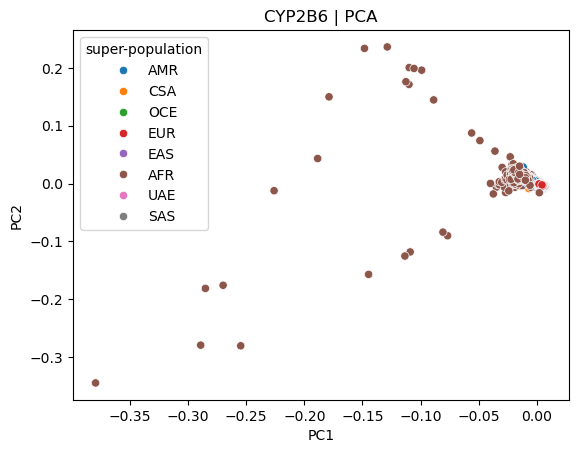

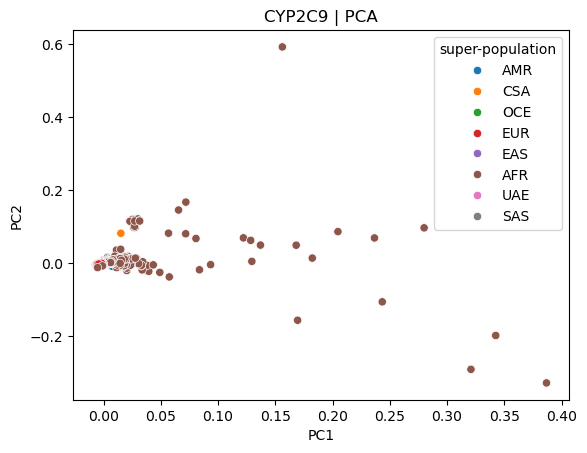

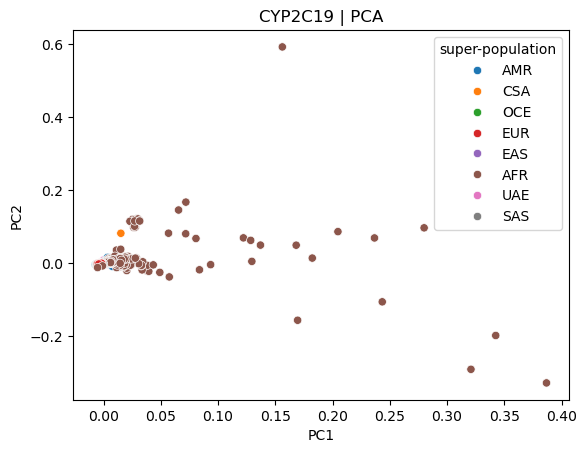

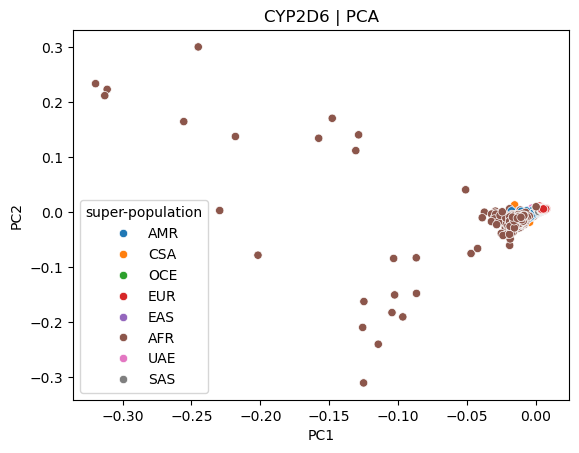

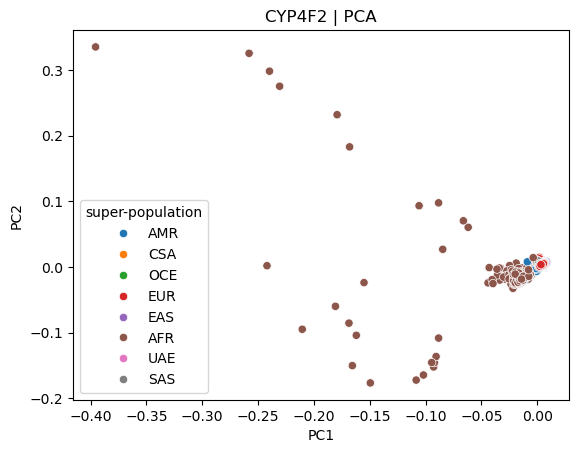

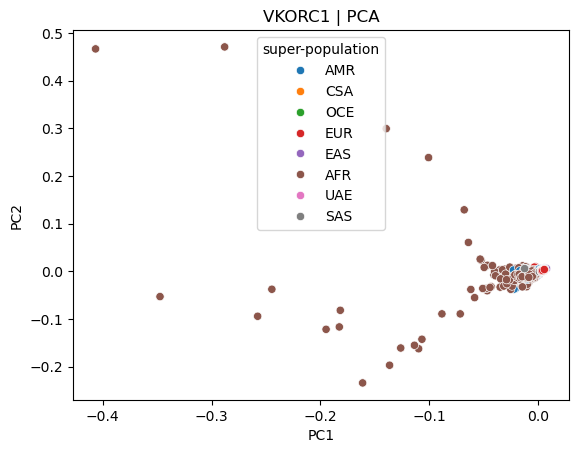

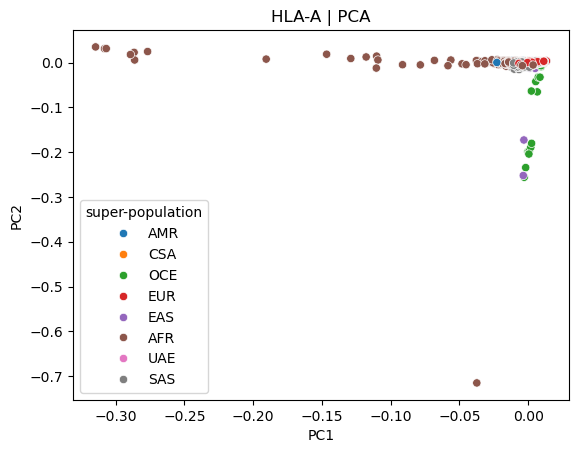

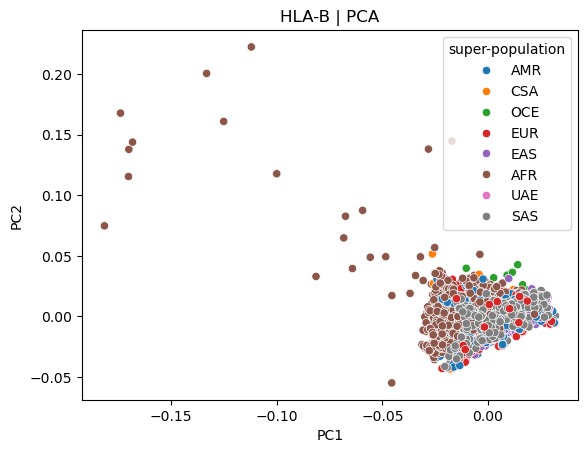

In [38]:
FIGURE = dict()

for gene in LOCATIONS["location_name"].unique().tolist():
    FIGURE[gene] = dict()
    FIGURE[gene] = scatterplot(DATA[gene]["eigenvectors"], x="PC1", y="PC2", hue="super-population")

    FIGURE[gene].set_title(f"{gene} | PCA")

    plt.show()

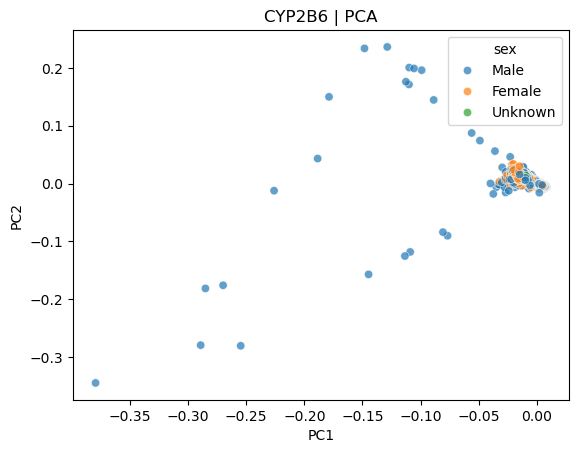

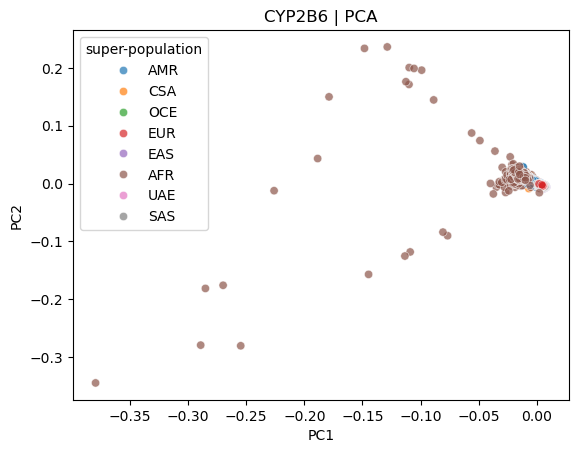

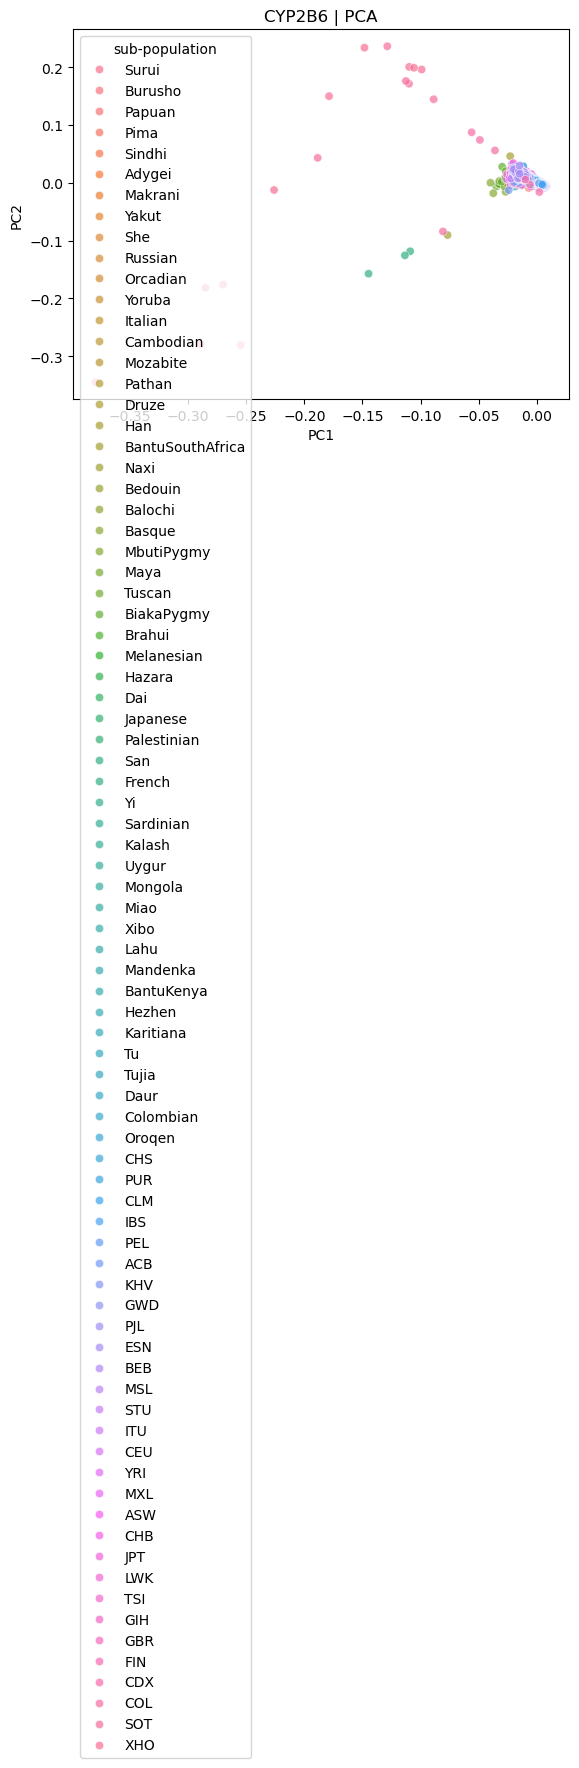

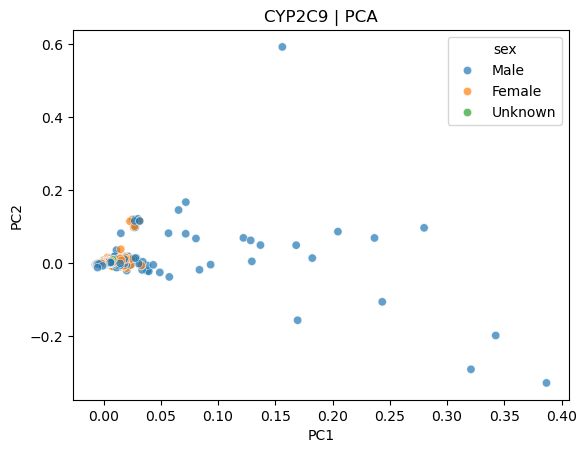

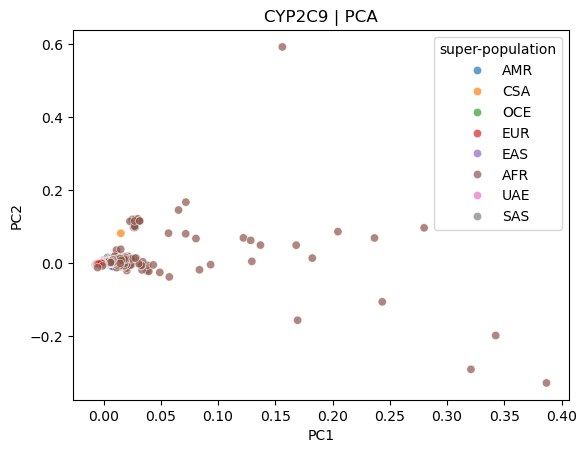

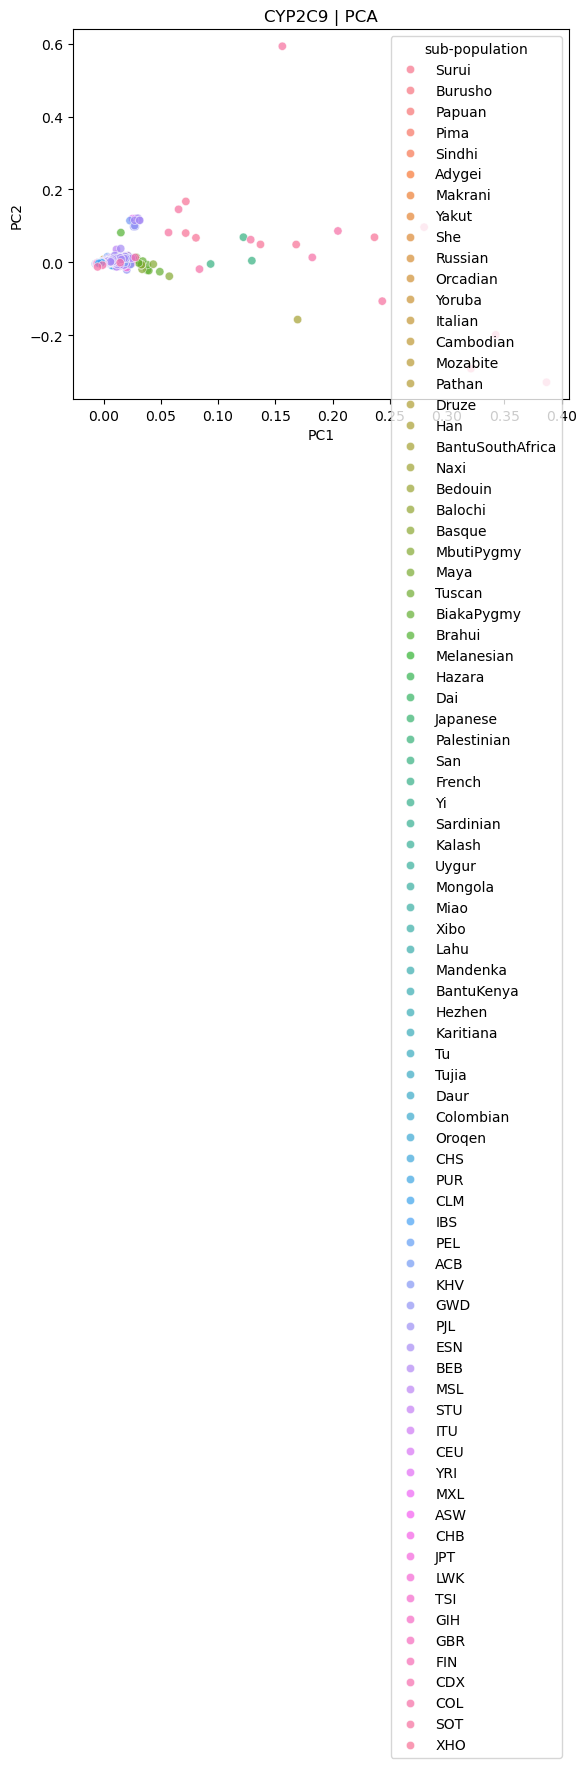

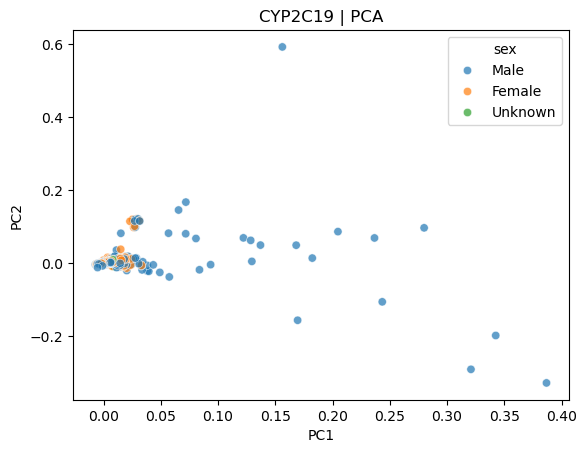

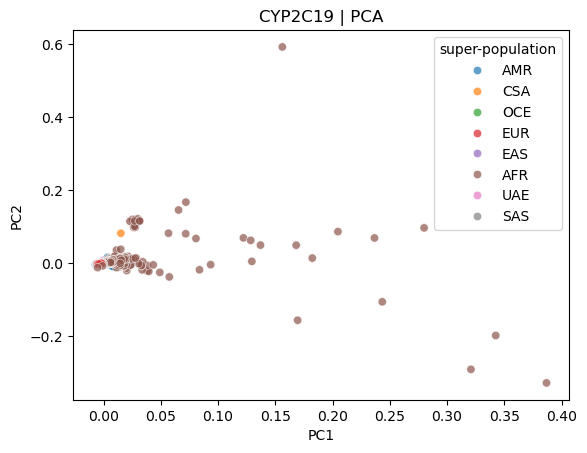

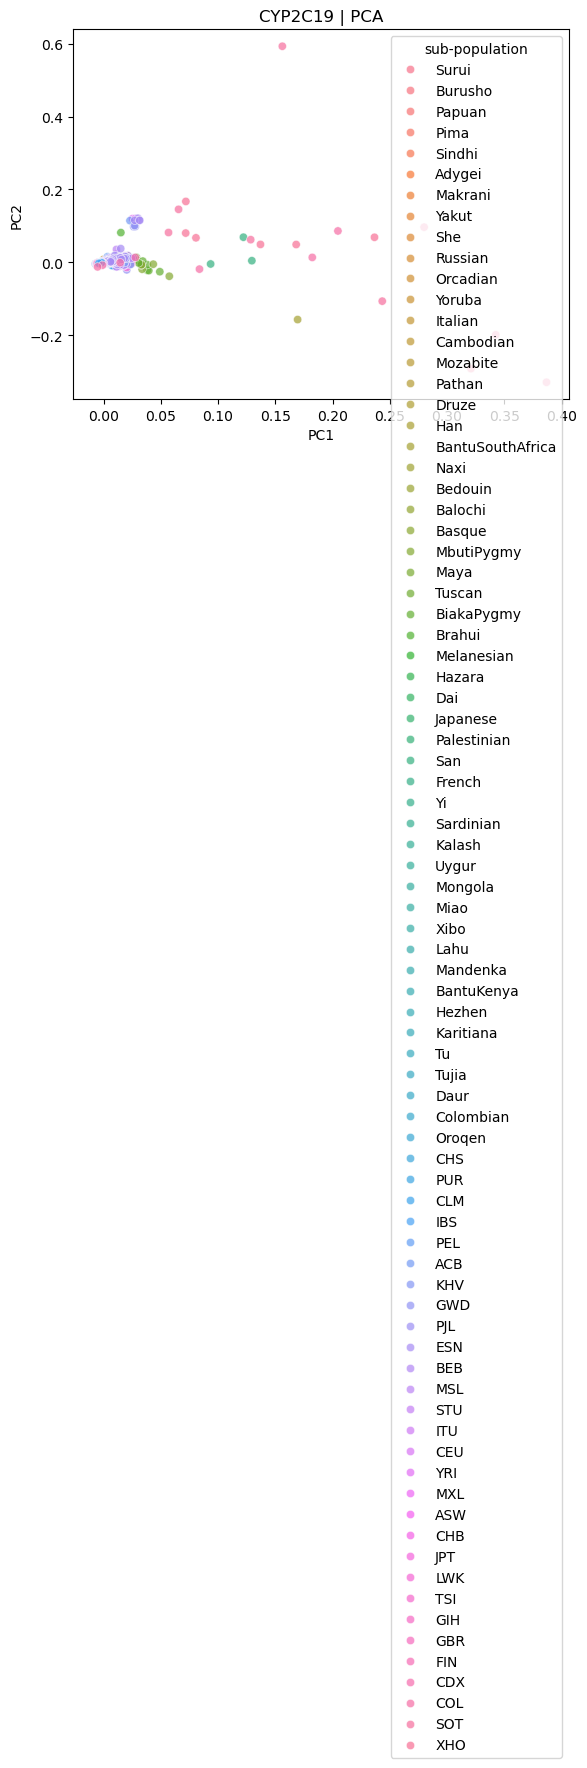

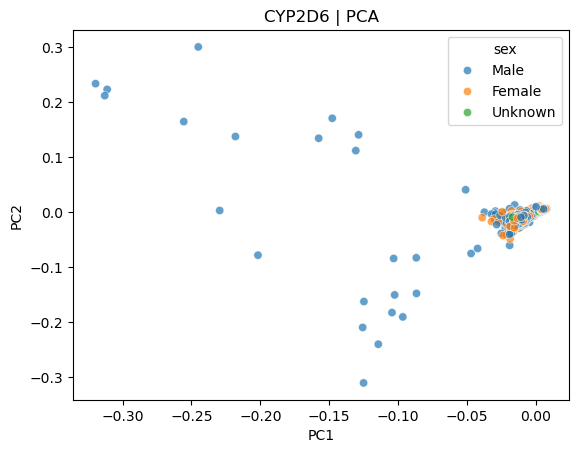

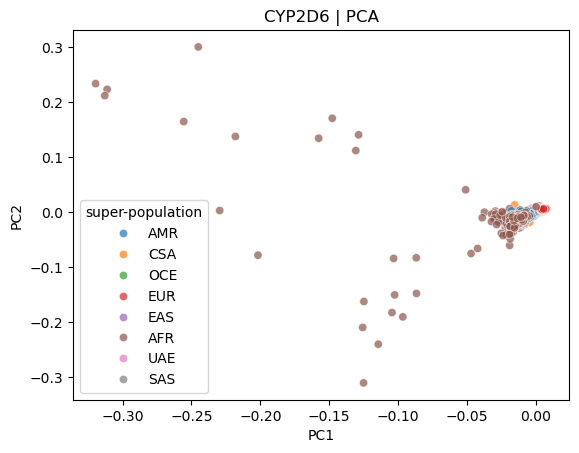

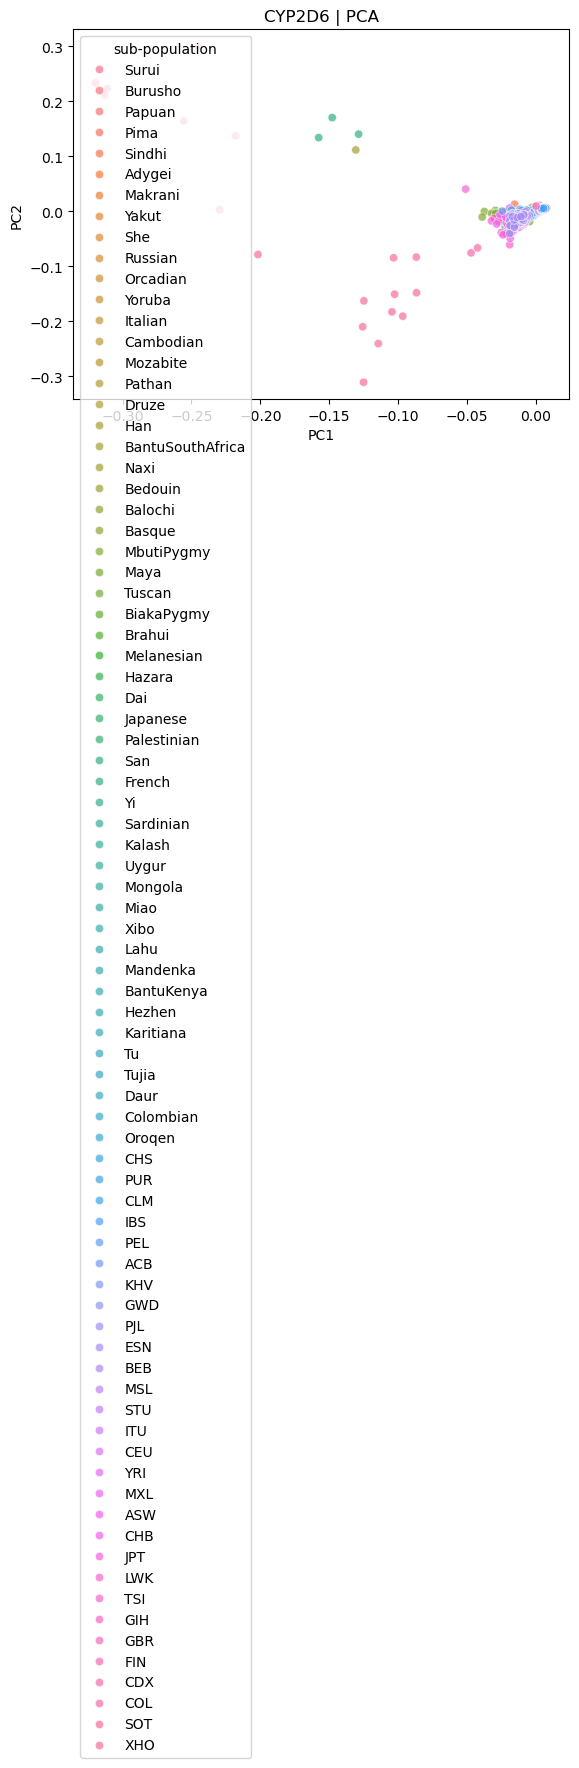

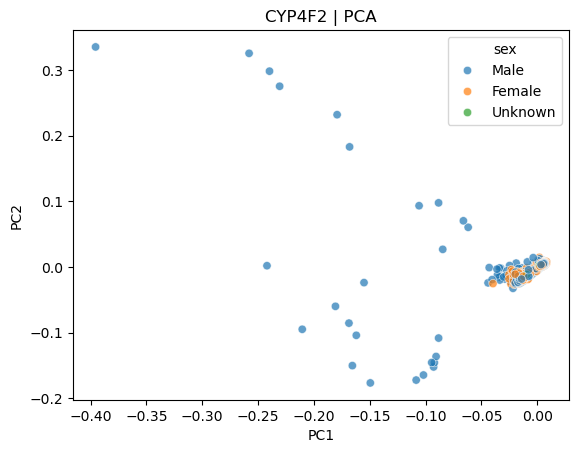

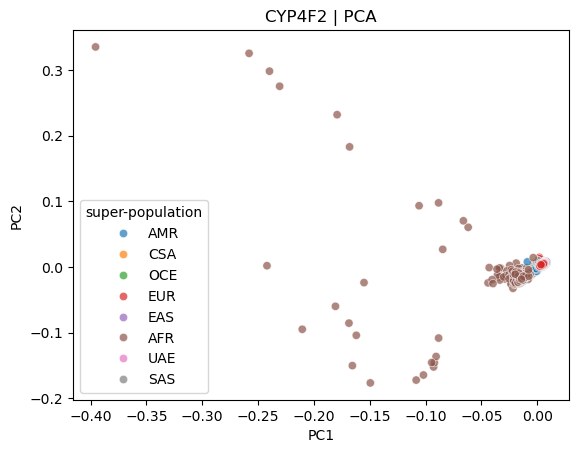

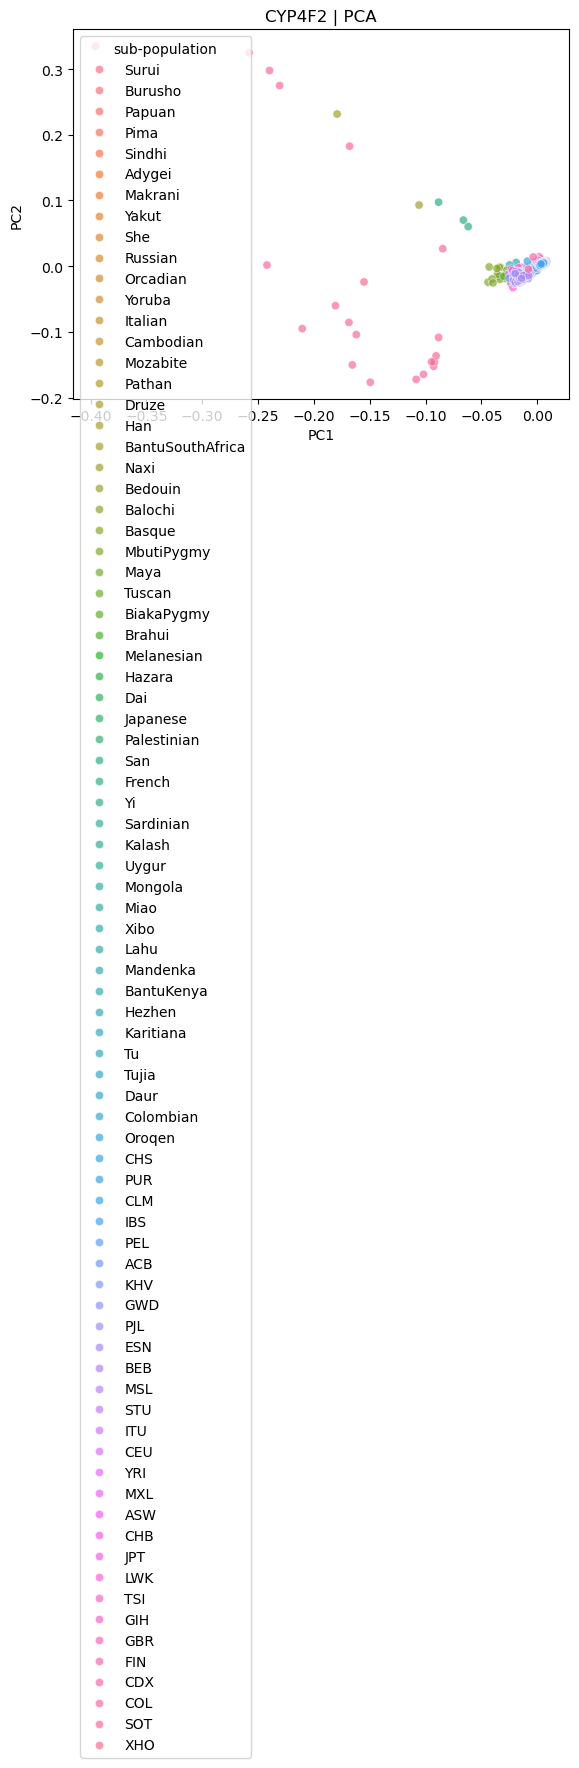

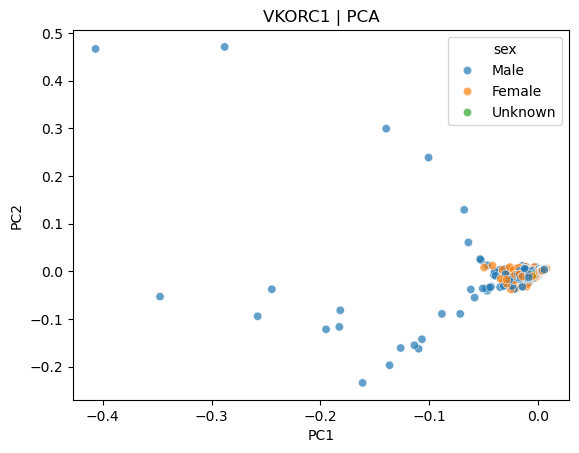

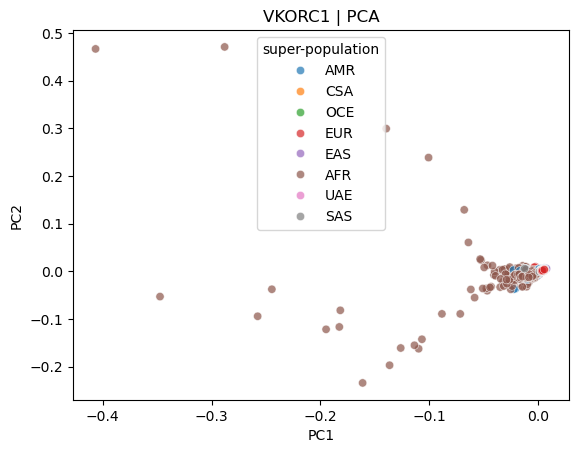

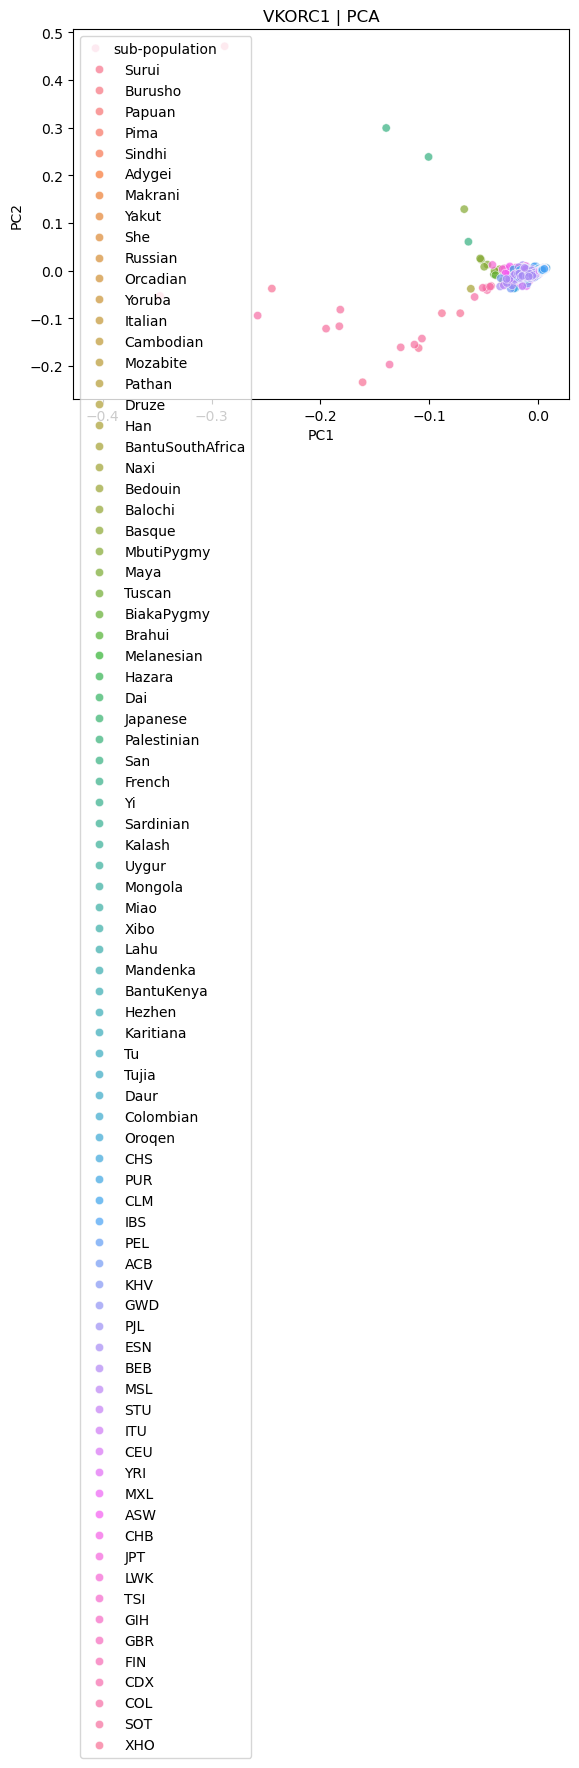

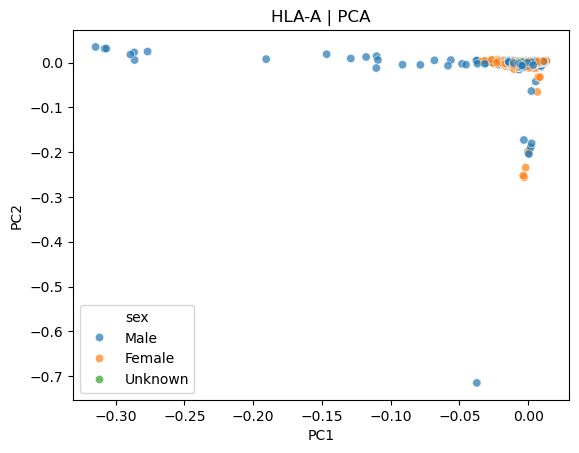

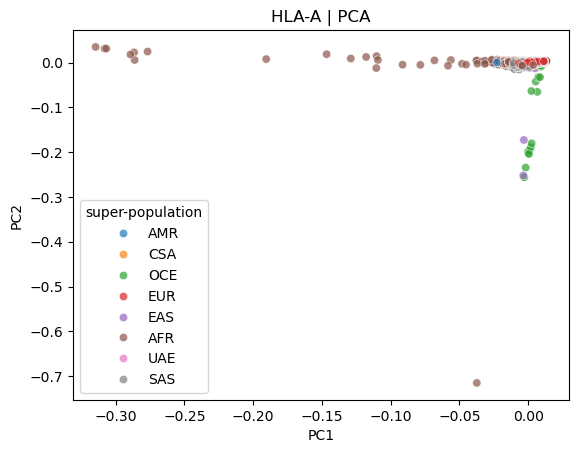

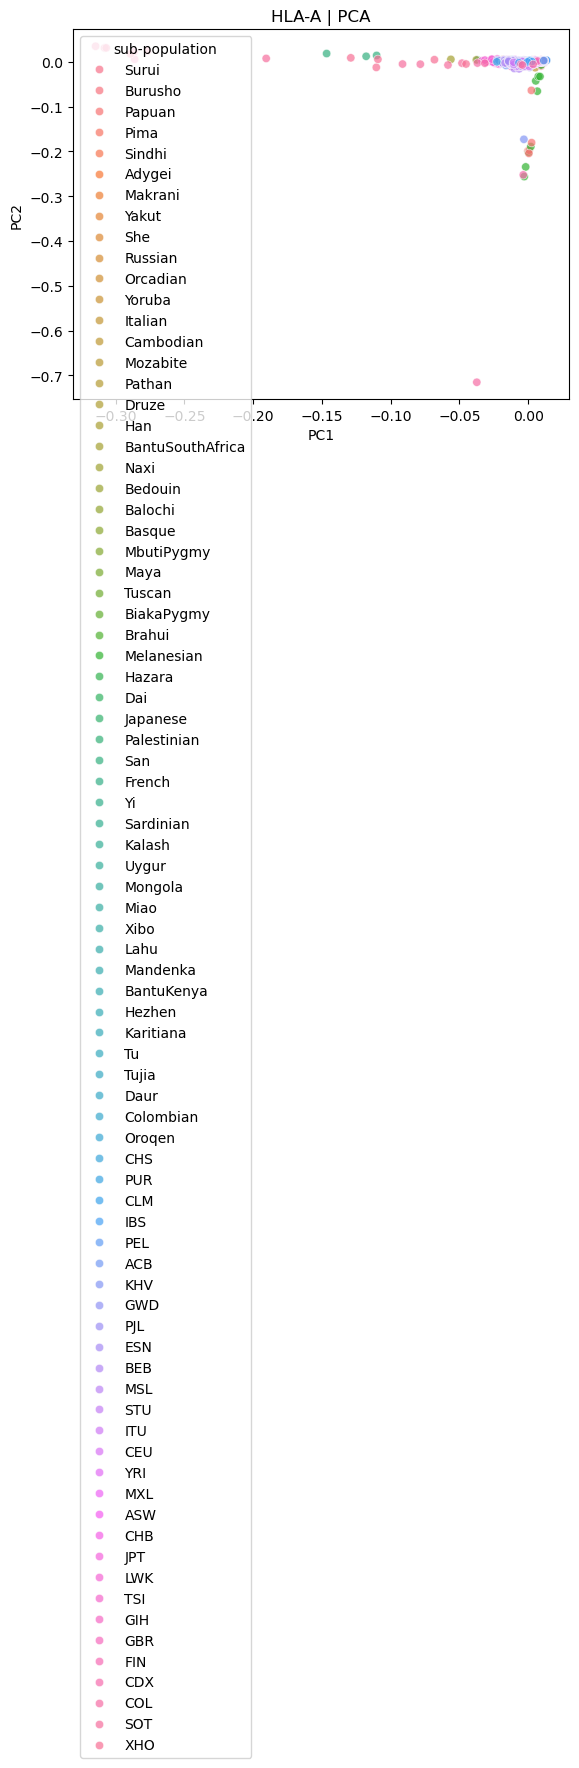

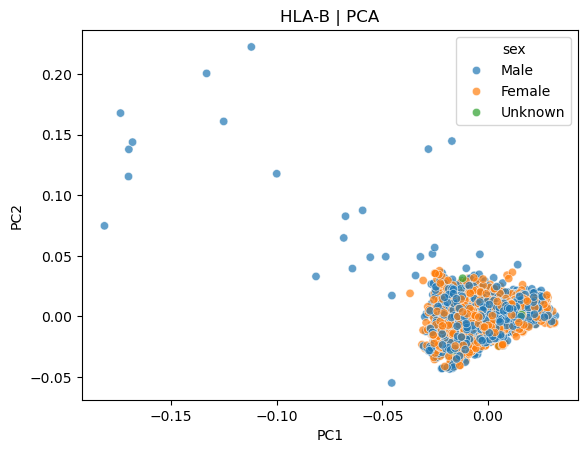

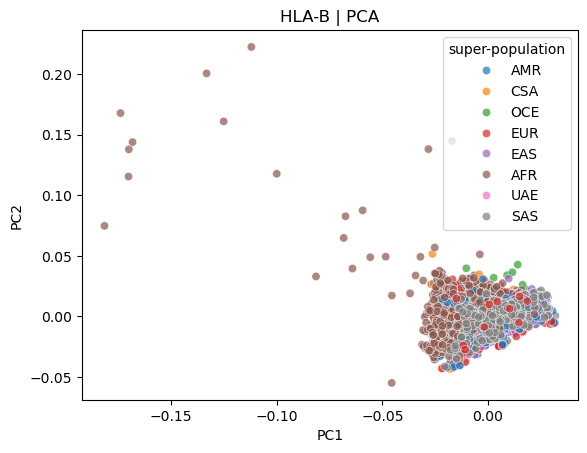

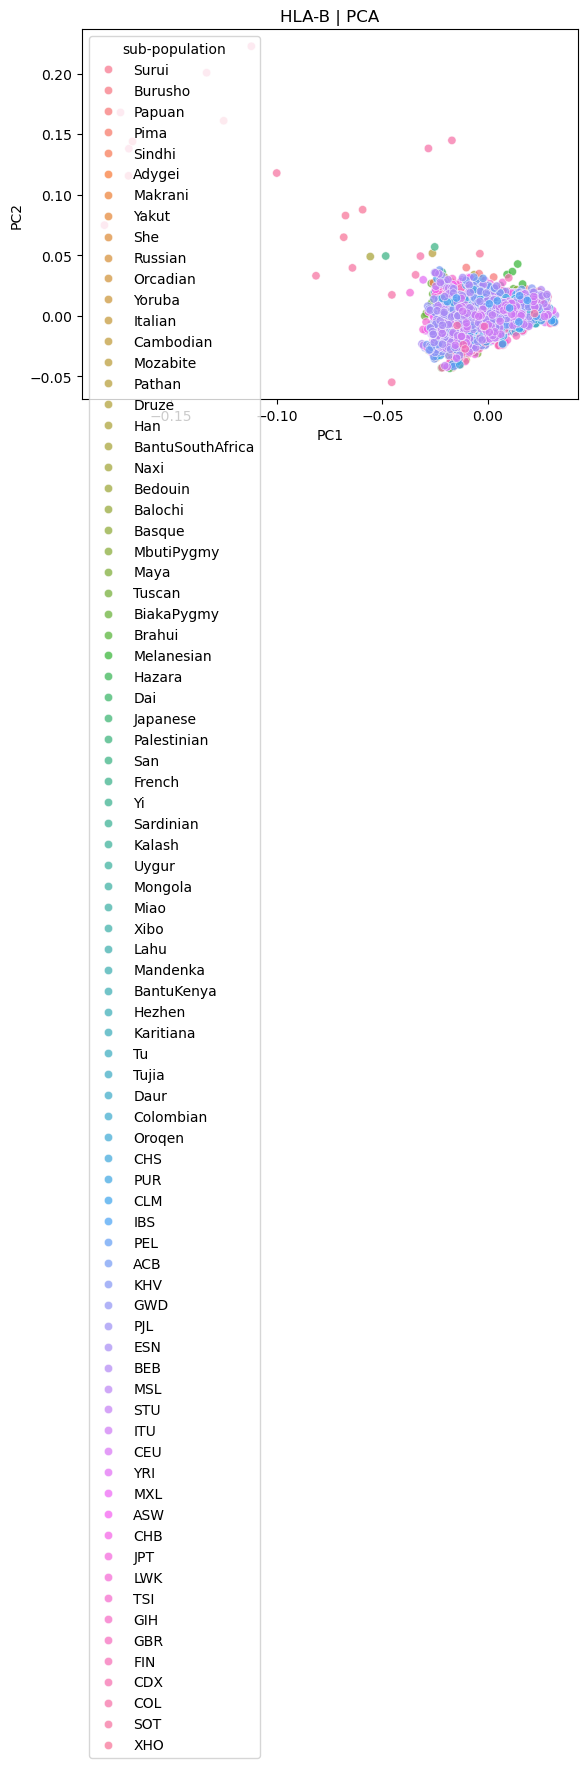

In [39]:
FIGURE = dict()

for gene in LOCATIONS["location_name"].unique().tolist():
    FIGURE[gene] = dict()
    for cluster in ["sex", "super-population", "sub-population"]:
        FIGURE[gene][cluster] = dict()
        FIGURE[gene][cluster] = scatterplot(DATA[gene]["eigenvectors"], x="PC1", y="PC2", hue=cluster, alpha=0.7)

        FIGURE[gene][cluster].set_title(f"{gene} | PCA")

        plt.show()

## Export Figures

In [40]:
Path(join(path, "Graphs", "07")).mkdir(exist_ok=True, parents=True)

In [30]:
for gene in LOCATIONS["location_name"].unique().tolist():
    for cluster in ["sex", "super-population", "sub-population"]:
        Path(join(path, "Graphs", "07", cluster)).mkdir(exist_ok=True)
        FIGURE[gene][cluster].figure.savefig(
            join(path, "Graphs", "07", cluster, f"PCA {gene}.jpeg"),
            format="jpeg",
            bbox_inches="tight",
        )